# Code for "Prospectively validated predictor reveals first molecular phenotypes of hypertensive disorders of pregnancy"

This notebook contains the code to generate the following figures:
* Figure 2c
* Figure 3
* Figure 4a & b
* Extended Data Fig2 

# Paths to Input Files

In [1]:
# Path to genes analyzed
input_gene_json_file_path = "./genes_space.json"

# Path to sample data containing PAPPA2 for Figure 3
input_sample_data_file_path = "./sample_data.feather"

# Path to DE results for Figure 3
input_fig3_de_data_file_path = "./fig3_de_data.feather"

# Path to DE results for Figures 4a and 4b
input_fig4ab_de_data_file_path = "./fig4ab_de_data.feather"

# Path to DE results for Extended Data Figure 2
input_ed_fig2_de_data_file_path = "./ed_fig2_de_data.feather"

# Figure Generation Code

In [2]:
# Load Libraries
import json
from pathlib import Path

import numpy as np
import pandas as pd

In [3]:
# Loading notebook functions
%run ./helper_functions.py

# Load Input Data

In [4]:
# get genes
with open(input_gene_json_file_path) as f:
    gene_space = json.load(f)
    
print(f"Number of genes from training: {len(gene_space['all_genes'])}")

Number of genes from training: 2036


In [5]:
sample_data = pd.read_feather(input_sample_data_file_path)
assert len(sample_data) == 5399

fig3_de_data = pd.read_feather(input_fig3_de_data_file_path)
assert len(fig3_de_data) == 3*len(gene_space['all_genes']), "Mismatch between input genes and Fig3 DE data"

fig4ab_de_data = pd.read_feather(input_fig4ab_de_data_file_path)
assert len(fig4ab_de_data) == 2*len(gene_space['all_genes']), "Mismatch between input genes and Fig3 DE data"

ed_fig2_de_data = pd.read_feather(input_ed_fig2_de_data_file_path)
assert len(ed_fig2_de_data) == 3*len(gene_space['all_genes']), \
    "Mismatch between input genes and Extended Data Fig2 DE data"



# Figure 2c

Gestational age at delivery (weeks), No MRF
PAPPA2 (log2cpm), r2: {False: np.float64(0.00036674168559630376), True: np.float64(0.17249448767561468)}



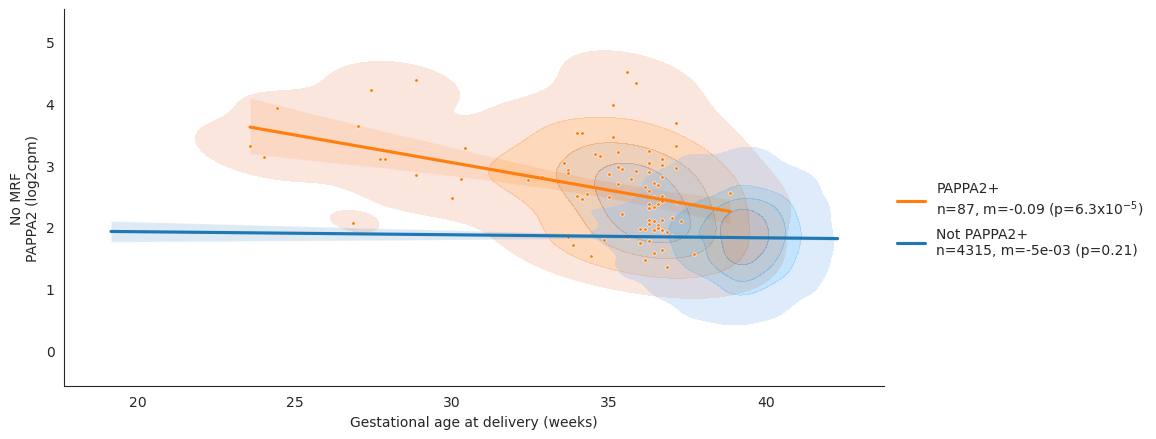

In [6]:
scatter_plot_with_fits(
    df=sample_data[sample_data.is_nmrf == True].reset_index(drop=True),
    
    y_label='PAPPA2',
    y_vanity_label = 'No MRF\nPAPPA2 (log2cpm)',
    
    x_label='delivery_ga',
    x_vanity_label = 'Gestational age at delivery (weeks)',
    prediction_label = 'is_pappa2_hdp',
    prediction_vanity_label = 'PAPPA2+'
)

# Figure 3

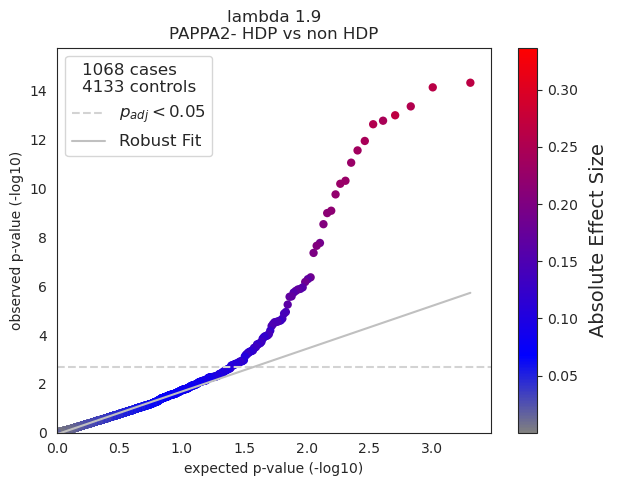

   feature        pvalue  cohens_d
0     C1QC  4.628086e-15  0.265251
1  SLCO2B1  7.161184e-15  0.262211
2      AXL  4.312980e-14  0.254656
3    FCGBP  9.968233e-14  0.267965
4   IGSF21  1.664687e-13  0.245593
5    CD163  2.321784e-13  0.254576
6     MRC1  1.123503e-12  0.243670
7    STAB1  2.741530e-12  0.237506
8     C1QB  8.715772e-12  0.227944
9    LYVE1  4.794132e-11  0.227584




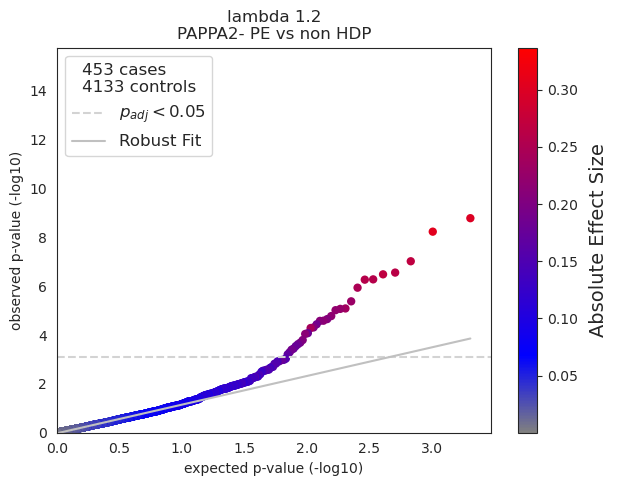

   feature        pvalue  cohens_d
0  SLCO2B1  1.635354e-09  0.299566
1    CD163  5.825681e-09  0.306067
2      AXL  9.495952e-08  0.268741
3    STAB1  2.763036e-07  0.262429
4    FCGBP  3.259406e-07  0.269123
5     MRC1  5.237307e-07  0.258176
6     C1QC  5.389135e-07  0.257887
7   IGSF21  1.148418e-06  0.247653
8    VSIG4  4.156829e-06  0.229946
9   LILRB5  8.136458e-06  0.237833




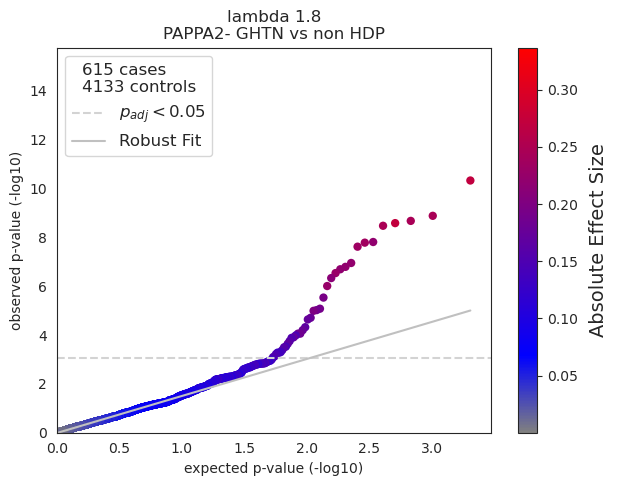

   feature        pvalue  cohens_d
0     C1QC  4.674539e-11  0.270296
1   IGSF21  1.308211e-09  0.245446
2     C1QB  2.109157e-09  0.245144
3    FCGBP  2.602868e-09  0.271034
4      AXL  3.342769e-09  0.246152
5    LYVE1  1.544629e-08  0.220731
6  SLCO2B1  1.642536e-08  0.237325
7     MRC1  2.401144e-08  0.233792
8    STAB1  1.116604e-07  0.221061
9    CD209  1.608574e-07  0.221707




In [7]:
plot_qq_set(
    df = fig3_de_data,
    eval_list = [
        ('PAPPA2- HDP vs non HDP', 10), 
        ('PAPPA2- PE vs non HDP', 10),
        ('PAPPA2- GHTN vs non HDP', 10)
    ]
)

# Figure 4a & b

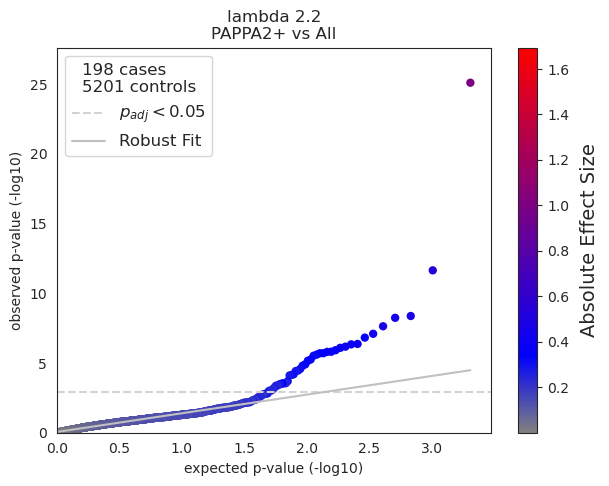

  feature        pvalue  cohens_d
0  PAPPA2  7.746916e-26  1.005365
1   CD163  2.241749e-12  0.531691
2   VSIG4  4.222232e-09  0.480664




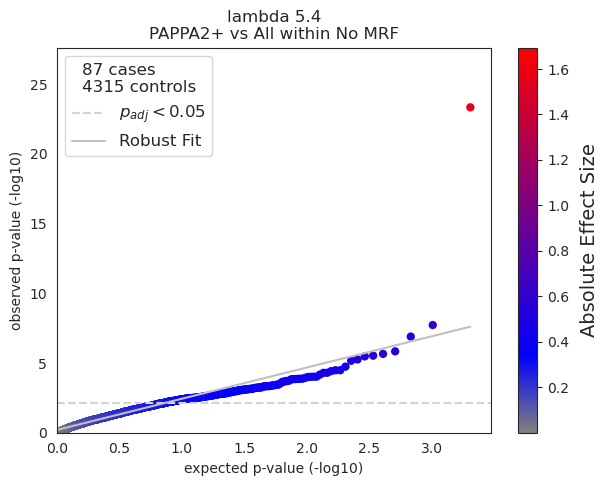

  feature        pvalue  cohens_d
0  PAPPA2  4.518104e-24  1.539630
1  ADAM12  1.871240e-08  0.614616
2   XAGE2  1.262447e-07  0.552106
3   KISS1  1.455827e-06  0.555073




In [8]:
plot_qq_set(
    df = fig4ab_de_data,
    eval_list = [
        ('PAPPA2+ vs All', 3), 
        ('PAPPA2+ vs All within No MRF', 4)
    ]
)

# Extended Data Figure 2

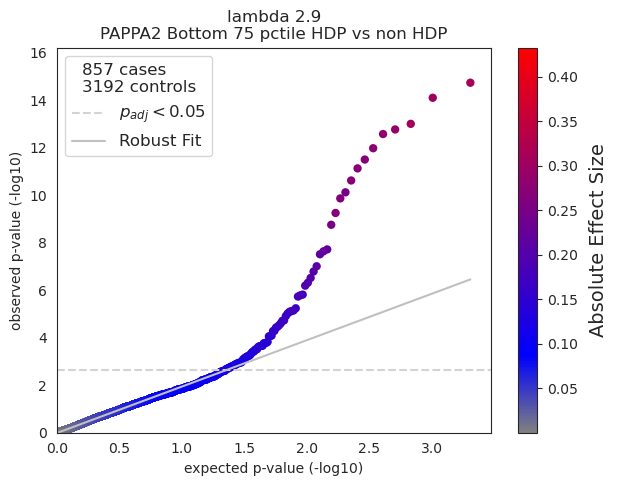

   feature        pvalue  cohens_d
0    CD163  1.869318e-15  0.312871
1  SLCO2B1  8.034646e-15  0.299601
2    FCGBP  1.005384e-13  0.308151
3      AXL  1.730112e-13  0.290597
4     C1QC  2.695143e-13  0.285370
5   IGSF21  1.066703e-12  0.279356
6    STAB1  3.193377e-12  0.270279
7     MRC1  7.516981e-12  0.269183
8    VSIG4  2.430310e-11  0.269404
9     C1QB  7.638096e-11  0.244488




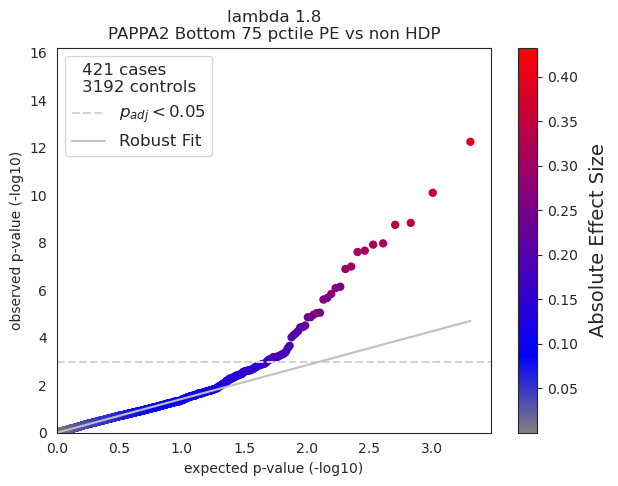

   feature        pvalue  cohens_d
0    CD163  5.708263e-13  0.393536
1  SLCO2B1  8.001091e-11  0.351737
2    FCGBP  1.482091e-09  0.347322
3      AXL  1.783640e-09  0.335135
4    VSIG4  1.079547e-08  0.314602
5    STAB1  1.217176e-08  0.312911
6     C1QC  2.181020e-08  0.307636
7   IGSF21  2.486321e-08  0.312652
8   LILRB5  1.020399e-07  0.306521
9     MRC1  1.289693e-07  0.295937




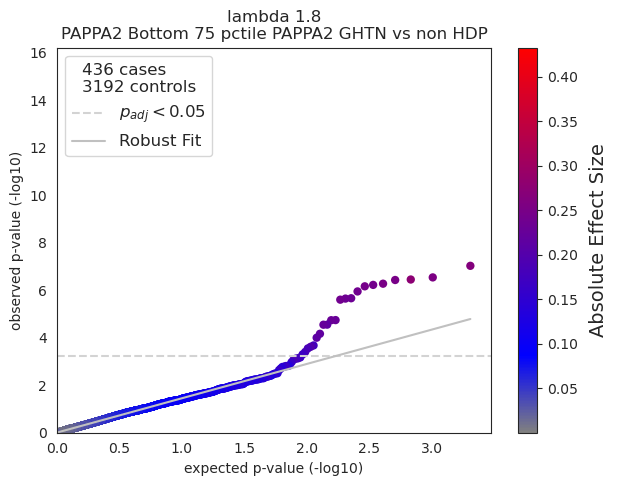

   feature        pvalue  cohens_d
0     C1QC  9.475320e-08  0.264734
1  SLCO2B1  2.911266e-07  0.253686
2    FCGBP  3.571258e-07  0.276991
3   IGSF21  3.743141e-07  0.250199
4      AXL  5.354882e-07  0.251395
5     C1QB  6.017046e-07  0.242622
6     MRC1  6.914049e-07  0.245786
7    LYVE1  1.133858e-06  0.238861
8    STAB1  2.193118e-06  0.232203
9    LAMC1  2.267022e-06  0.233722




In [9]:
plot_qq_set(
    df = ed_fig2_de_data,
    eval_list = [
        ('PAPPA2 Bottom 75 pctile HDP vs non HDP', 10),
        ('PAPPA2 Bottom 75 pctile PE vs non HDP', 10),
        ('PAPPA2 Bottom 75 pctile PAPPA2 GHTN vs non HDP', 10)
    ]
)